Get data and import modules

In [23]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.datasets import load_boston

In [24]:
boston = load_boston()

In [25]:
print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Investigate Data and Create Best Fit Line

Text(0, 0.5, 'Number of houses')

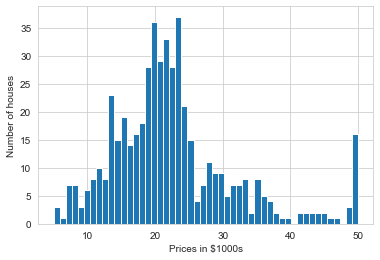

In [26]:
plt.hist(boston.target, bins=50)
plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')

Text(0.5, 0, 'Number of rooms')

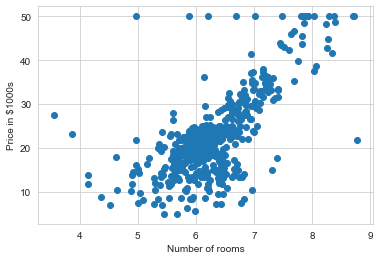

In [27]:
plt.scatter(boston.data[:,5], boston.target)

plt.ylabel("Price in $1000s")
plt.xlabel("Number of rooms")

In [28]:
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [29]:
boston_df['Price'] = boston.target

In [30]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


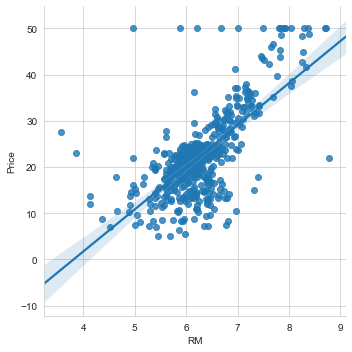

In [31]:
sns.lmplot('RM', 'Price', data=boston_df)

Best Fit Line from scratch

In [32]:
# X is rooms
X = boston_df.RM
# turns X into a 2d array
X = np.vstack(boston_df.RM)
# Y is Price
Y = boston_df.Price

In [33]:
# adds a 1 in each array
X = np.array([[value,1] for value in X])

In [34]:
X = np.vstack(boston_df.RM)

n,m = X.shape

ones = np.ones((n,1))

X = np.hstack((X,ones))

m, b = np.linalg.lstsq(X, Y, rcond = None)[0]

In [35]:
X

array([[6.575, 1.   ],
       [6.421, 1.   ],
       [7.185, 1.   ],
       ...,
       [6.976, 1.   ],
       [6.794, 1.   ],
       [6.03 , 1.   ]])

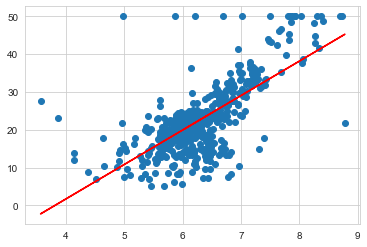

In [36]:
plt.plot(boston_df.RM, boston_df.Price, 'o')
x=boston_df.RM
plt.plot(x, m*x + b, 'r', label='Best Fit Line')

Find Error in the Best Fit Line

In [39]:
# Get the resulting array
result = np.linalg.lstsq(X,Y, rcond=None)

# Get the total error
error_total = result[1]

# Get the root mean square error
rmse = np.sqrt(error_total/len(X))

print("The root mean square error was %.2f"%rmse)

The root mean square error was 6.60


Note: RMSE corresponds to the Standard Deviation. So, with 95% accuracy we can say that the house price won't be more that 2 SD or $13200 from our fit line.

Using Sci Kit Learn (sklearn)

In [40]:
import sklearn
from sklearn.linear_model import LinearRegression

In [41]:
lreg = LinearRegression()

In [42]:
X_multi = boston_df.drop('Price', 1)
Y_target = boston_df.Price

In [44]:
lreg.fit(X_multi, Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
print ('THe estimated intercept coefficient is %.2f' %lreg.intercept_)
print ('The number of coefficients used was %d' %len(lreg.coef_))

THe estimated intercept coefficient is 36.46
The number of coefficients used was 13


In [48]:
# Table of coefficients
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']
coeff_df['Coefficient Estimate'] = Series(lreg.coef_)
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


Using Training and Validation

In [50]:
#split data into training set and testing set
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, boston_df.Price)

In [51]:
#print shape to see how data was split
print (X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


In [52]:
# fit training set to a linear regression
lreg = LinearRegression()
lreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
# run prediction for test and train set
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [58]:
# find error (MSE)
print ("Fit a model X_train and calculate the MSE with Y_train: %.2f"%np.mean((Y_train - pred_train)**2))
print ("Fit a model X_train and calculate MSE with X_test and Y_test: %.2f"%np.mean((Y_test - pred_test)**2))

Fit a model X_train and calculate the MSE with Y_train: 44.09
Fit a model X_train and calculate MSE with X_test and Y_test: 42.31


Residual Plots

Text(0.5, 1.0, 'Residual Plots')

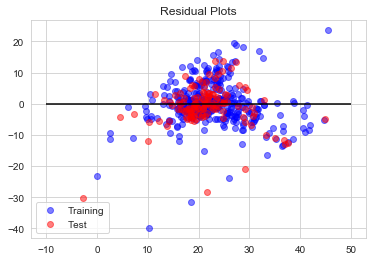

In [60]:
# scatter plot the training data
train = plt.scatter(pred_train, (pred_train - Y_train), c='b', alpha=0.5)

# scatter plot the test data
test = plt.scatter(pred_test, (pred_test-Y_test), c='r', alpha=0.5)

plt.hlines(y=0, xmin=-10, xmax=50)

plt.legend((train, test), ('Training', 'Test'), loc='lower left')

plt.title('Residual Plots')